In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings

import sklearn
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib



import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, cohen_kappa_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [ ]:
# Load in the cleaned/normalized dataset

combined_data = pd.read_csv("/content/drive/MyDrive/ENEE408N/Sleep Analysis Research/DATA_SETS/test2.csv")
combined_data.head()

,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,circadian_cosine,circadian_decay,circadian_linear,Sleep_Stage,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events,artifact,sid
0,0.215679,0.516293,0.499829,0.448541,0.445365,0.628456,0.563598,0.361111,0.266667,0.341628,...,0.792550,1.000000,0.000000,0,0.0,0.0,0.0,0.0,1.0,S002
1,0.656957,0.157949,0.098599,0.099325,0.097596,0.195178,0.196617,0.361111,0.506667,0.647154,...,0.794376,0.995443,0.001348,0,0.0,0.0,0.0,0.0,1.0,S002
2,0.638216,0.148870,0.073967,0.072398,0.071112,0.148628,0.145472,0.398148,0.320000,0.395054,...,0.796195,0.990907,0.002695,0,0.0,0.0,0.0,0.0,0.0,S002
3,0.699413,0.116102,0.072649,0.072891,0.071499,0.154617,0.155133,0.250000,0.253333,0.365007,...,0.798007,0.986390,0.004043,0,0.0,0.0,0.0,0.0,0.0,S002
4,0.680527,0.130083,0.067667,0.059069,0.057890,0.140486,0.122657,0.324074,0.240000,0.319592,...,0.799812,0.981893,0.005391,0,0.0,0.0,0.0,0.0,1.0,S002


In [ ]:
#get x and y/training and testing

X = combined_data.drop("Sleep_Stage", axis=1).drop("sid", axis=1)
y = combined_data["Sleep_Stage"]

#split data into test and training data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)



In [ ]:
#create and fit data/train
classifier = sklearn.tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)


DecisionTreeClassifier()

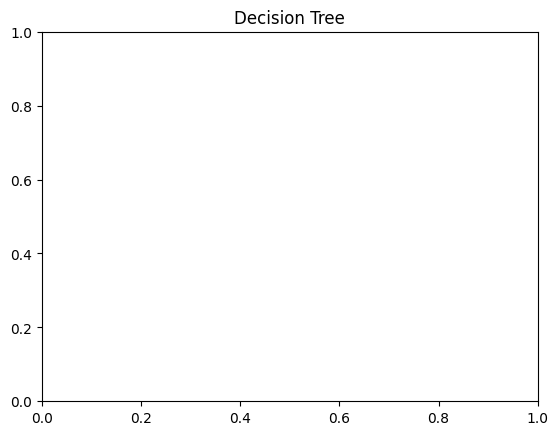

In [ ]:
#visualize
#can use matplotlib and sklearn to plot the tree
plt.figure()
# Convert class names to strings
class_names_str = [str(c) for c in classifier.classes_] # Convert class names to strings
#sklearn.tree.plot_tree(classifier, feature_names=X.columns, class_names=class_names_str) # Pass the string class names
plt.title("Decision Tree")
plt.show()

In [ ]:
# analysis
from sklearn.metrics import mean_squared_error, r2_score, f1_score, cohen_kappa_score

y_pred = classifier.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)

print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score (Weighted): {f1:.3f}")
print(f"Cohen's Kappa: {kappa:.3f}")

R-squared (R²): -0.005
Mean Squared Error (MSE): 1.759
Root Mean Squared Error (RMSE): 1.326
Accuracy: 0.593
F1 Score (Weighted): 0.594
Cohen's Kappa: 0.389
